In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset_train = pd.read_csv('heart_disease_train.csv')
dataset_train.head()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,63,1.0,0,0.0,0.0,0,1,0,190.0,148.0,90.0,27.13,72.0,86.0,0
1,1,45,3.0,0,0.0,0.0,0,0,0,162.0,125.0,89.0,27.98,85.0,83.0,0
2,0,51,1.0,1,2.0,0.0,0,0,0,261.0,127.0,81.0,20.24,75.0,96.0,0
3,1,45,3.0,1,30.0,0.0,0,0,0,250.0,126.0,89.5,28.68,75.0,92.0,0
4,0,45,2.0,1,3.0,0.0,0,0,0,250.0,130.0,80.0,20.24,90.0,86.0,0


In [3]:
dataset_test = pd.read_csv('heart_disease_test.csv')
dataset_test.head()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,56,1.0,0,0.0,0.0,0,1,1,273.0,136.0,80.0,27.73,90.0,210.0,1
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,0,52,1.0,0,0.0,0.0,0,0,0,275.0,112.0,71.0,25.68,80.0,NaN,0
3,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
4,1,69,1.0,1,1.0,0.0,0,0,0,245.0,123.0,77.0,26.58,70.0,81.0,1


In [4]:
# Count of NA values in each column of the training dataset
na_counts_train = dataset_train.isna().sum()
print("NA counts in training data:")
print(na_counts_train)

NA counts in training data:
gender               0
age                  0
education           84
currentSmoker        0
cigsPerDay          25
BPMeds              42
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             44
sysBP                0
diaBP                0
BMI                 16
heartRate            1
glucose            315
TenYearCHD           0
dtype: int64


In [5]:
# Count of NA values in each column of the training dataset
na_counts_test = dataset_test.isna().sum()
print("NA counts in training data:")
print(na_counts_test)

NA counts in training data:
gender              0
age                 0
education          21
currentSmoker       0
cigsPerDay          4
BPMeds             11
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol             6
sysBP               0
diaBP               0
BMI                 3
heartRate           0
glucose            73
TenYearCHD          0
dtype: int64


In [6]:
dataset_train = dataset_train.fillna(dataset_train.mean())
# Count of NA values in each column of the training dataset
na_counts_train = dataset_train.isna().sum()
print("NA counts in training data:")
print(na_counts_train)

NA counts in training data:
gender             0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


In [7]:
# use the train set to fillout the missing data for test set
dataset_test = dataset_test.fillna(dataset_train.mean())
# Count of NA values in each column of the training dataset
na_counts_test = dataset_test.isna().sum()
print("NA counts in test data:")
print(na_counts_test)

NA counts in test data:
gender             0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


In [8]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [9]:
def initialize_weights(n_features, seed=42):
    # Set the random seed 
    np.random.seed(seed)
    return np.random.randn(n_features) * 0.01

In [10]:
def calculate_J_logistic(X: np.ndarray, y: np.ndarray, weights: np.ndarray):
    m = len(y)
    y_pred = sigmoid(X.dot(weights))

    # Clip predictions to avoid log(0)
    epsilon = 1e-10  # Small constant to avoid log(0)
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)

    J = (-1/m) * (np.sum(y*np.log(y_pred) + (1-y)*np.log(1-y_pred)))
    return J

In [11]:
def predict(X, weights, threshold=0.5):
    z = X.dot(weights)
    y_pred = sigmoid(z)
    return (y_pred >= threshold).astype(int)

In [12]:
def confusion_matrix(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1)) # True Possitive
    TN = np.sum((y_true == 0) & (y_pred == 0)) # True Negative
    FP = np.sum((y_true == 0) & (y_pred == 1)) # False Possitive
    FN = np.sum((y_true == 1) & (y_pred == 0)) # False Negative
    return np.array([[TP, FN], [FP, TN]])

In [13]:
def accuracy(cm):
    return (cm[0,0] + cm[1, 1]) / np.sum(cm)

In [14]:
def precision(cm):
    return cm[0,0] / (cm[0,0] + cm[1,0])

In [15]:
def recall(cm):
    return cm[0,0] / (cm[0,0] + cm[0,1])

In [16]:
def evaluate_model(y, y_pred):
    cm = confusion_matrix(y, y_pred)

    print("Training Confusion Matrix:\n", cm)
    print(f"Training Accuracy: {accuracy(cm)}")
    print(f"Training Precision: {precision(cm)}")
    print(f"Training Recall: {recall(cm)}")

In [17]:
def gradient_descent(alpha, X: np.ndarray, y: np.ndarray, y_pred:np.ndarray, weights: np.ndarray):
    m = len(y)
    gradient = (1/m) * X.T.dot(y_pred - y)
    weights -= alpha * gradient
    return weights

In [18]:
def logistic_regression(X, y, alpha, epochs):
    n_features = X.shape[1]
    weights = initialize_weights(n_features)
    for epoch in range(epochs):
        # Compute prediction
        z = X.dot(weights)
        y_pred = sigmoid(z)

        # update weights
        weights = gradient_descent(alpha, X, y, y_pred, weights)
    return weights

In [19]:
def hyperparameter_tuning(X_train, y_train, X_test, y_test, alpha_list, epochs_list):
    best_alpha = None
    best_epochs = None
    best_weights = None
    best_accuracy = 0

    for alpha in alpha_list:
        for epochs in epochs_list:
            weights = logistic_regression(X_train, y_train, alpha, epochs)
            y_test_pred = predict(X_test, weights, threshold=0.5)
            cm = confusion_matrix(y_test, y_test_pred)
            current_accuracy = accuracy(cm)
            if current_accuracy > best_accuracy:
                best_accuracy, best_alpha, best_epochs , best_weights = current_accuracy, alpha, epochs, weights
    
    return best_alpha, best_epochs, best_accuracy, best_weights

In [20]:
def roc_curve(y_true, y_score):
    thresholds = np.linspace(0, 1, 100)
    tpr_list = []
    fpr_list = []

    for threshold in thresholds:
        y_pred = y_score >= threshold
        cm = confusion_matrix(y_true, y_pred)
        tpr = cm[0, 0] / (cm[0, 0] + cm[0, 1])
        fpr = cm[1, 0] / (cm[1, 0] + cm[1, 1])
        tpr_list.append(tpr)
        fpr_list.append(fpr)

    return fpr_list, tpr_list

In [21]:
def calculate_auc(fpr, tpr):
    auc = 0.0
    for i in range(1, len(fpr)):
        # Calculate width (difference in FPR)
        width = abs(fpr[i] - fpr[i - 1])
        # Calculate height (average of TPR values at two points)
        height = abs(tpr[i] + tpr[i - 1]) / 2
        # Calculate trapezoid area and add to AUC
        auc += width * height
    return auc

In [22]:
def plot_roc_curve(y_true, y_score):
    fpr, tpr = roc_curve(y_true, y_score)
    roc_auc = calculate_auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

In [23]:
X_train = dataset_train.drop(columns=['TenYearCHD'])
y_train = dataset_train['TenYearCHD']

In [24]:
X_test = dataset_test.drop(columns=['TenYearCHD'])
y_test = dataset_test['TenYearCHD']

In [25]:
mean = X_train.mean()
std = X_train.std()

In [26]:
# Normalization
X_norm_train = (X_train - mean) / std
X_norm_train = np.c_[np.ones(X_norm_train.shape[0]), X_norm_train]  # Adds a column of 1s for the bias term


In [27]:
# Use the mean and std of train set to normalize the test set
X_norm_test = (X_test - mean) /std
X_norm_test = np.c_[np.ones(X_norm_test.shape[0]), X_norm_test]  # Adds a column of 1s for the bias term

In [28]:
alpha_list = [0.01, 0.1, 0.5]
epochs_list =  [100, 500, 1000]
best_alpha, best_epochs, best_accuracy, best_weights = hyperparameter_tuning(X_norm_train, y_train, X_norm_test, y_test, alpha_list, epochs_list)
print(f"Best Alpha: {best_alpha}, Best Epochs: {best_epochs}, Best Accuracy: {best_accuracy}")

Best Alpha: 0.01, Best Epochs: 1000, Best Accuracy: 0.8561320754716981


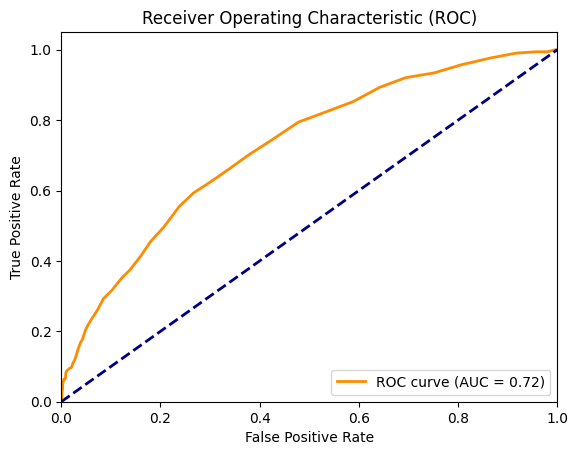

In [29]:
y_train_scores = sigmoid(X_norm_train.dot(best_weights))
plot_roc_curve(y_train, y_train_scores)

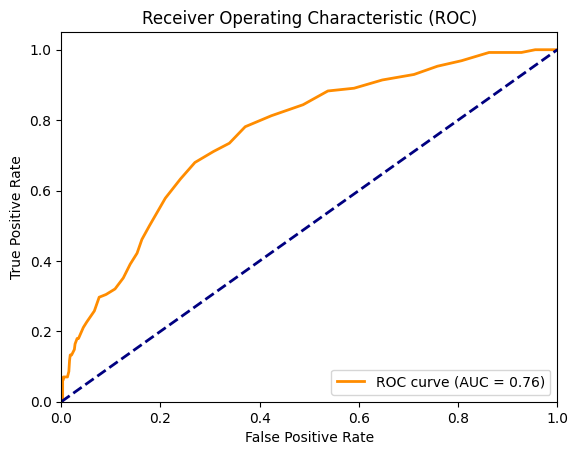

In [30]:
y_test_scores = sigmoid(X_norm_test.dot(best_weights))
plot_roc_curve(y_test, y_test_scores)